<h1 align=center> Paris Housing Prediction </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv('./ParisHousing.csv')
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [3]:
data.shape

(10000, 17)

In [4]:
data.isnull().mean()*100

squareMeters         0.0
numberOfRooms        0.0
hasYard              0.0
hasPool              0.0
floors               0.0
cityCode             0.0
cityPartRange        0.0
numPrevOwners        0.0
made                 0.0
isNewBuilt           0.0
hasStormProtector    0.0
basement             0.0
attic                0.0
garage               0.0
hasStorageRoom       0.0
hasGuestRoom         0.0
price                0.0
dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [6]:
palette = itertools.cycle(sns.color_palette())

In [7]:
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


#### Univariate analysis

In [8]:
col =['squareMeters','floors', 'basement', 'attic', 'garage', 'price']

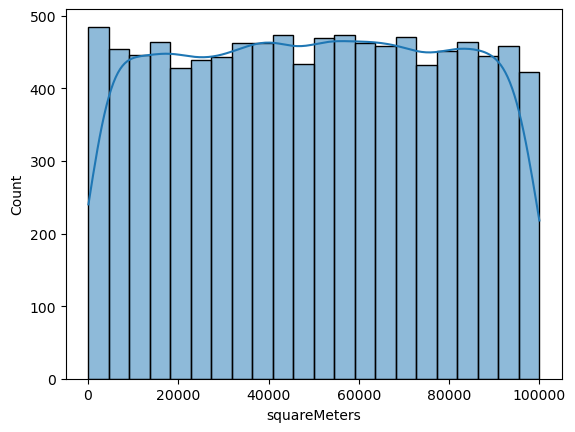

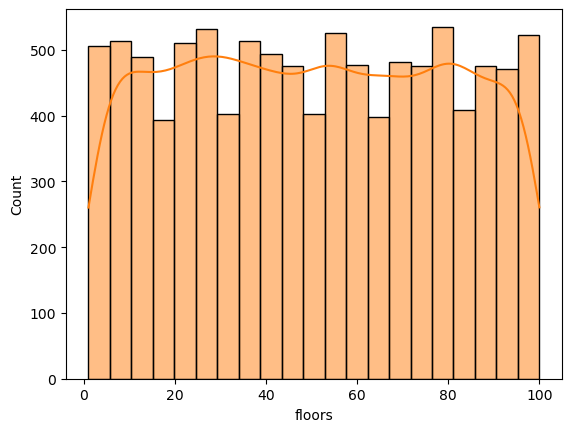

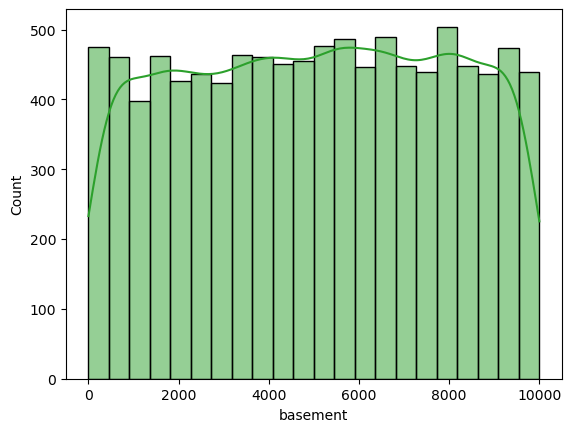

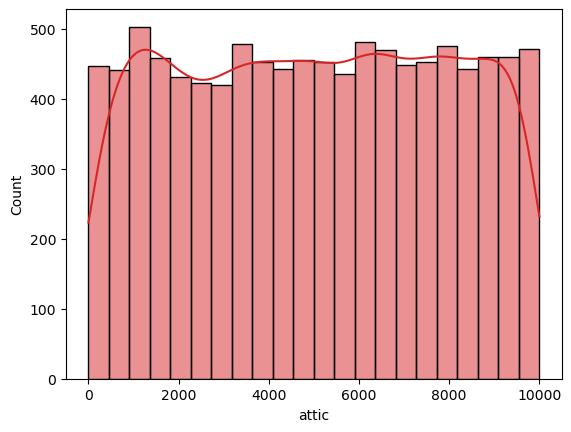

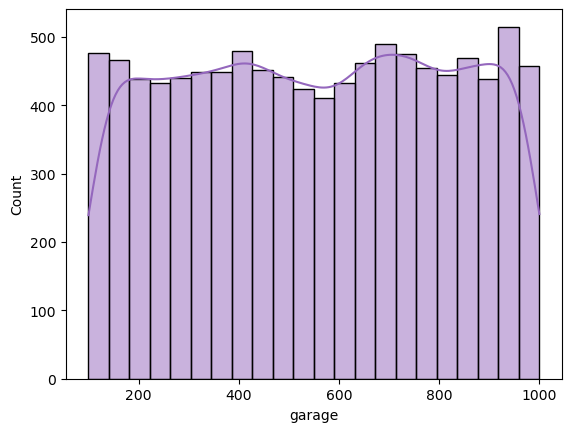

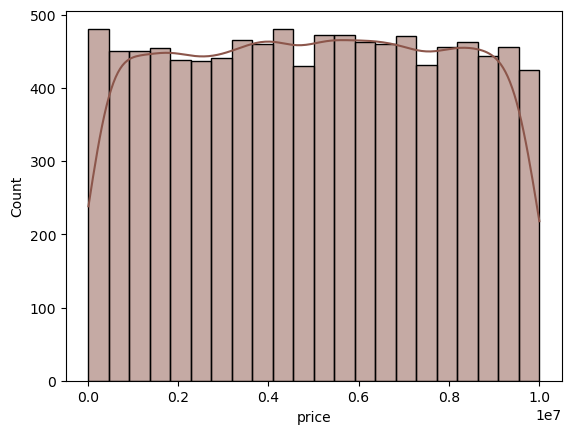

In [9]:
### Histogram
for i in col:
        sns.histplot(x=data[i],kde=True,color=next(palette))
        plt.show()

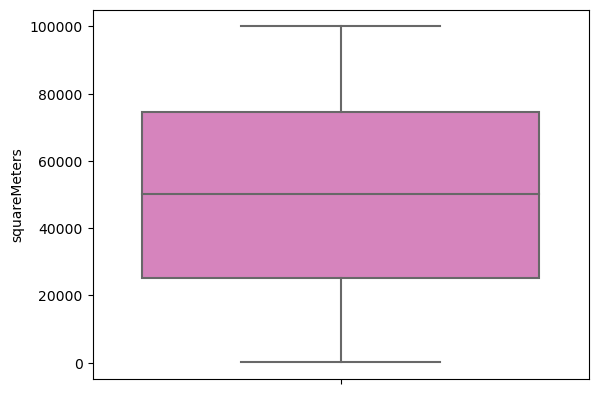

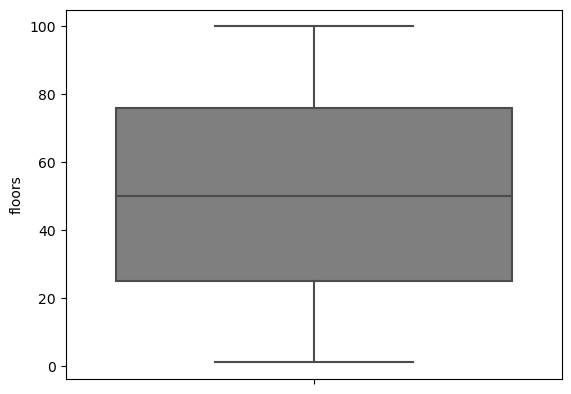

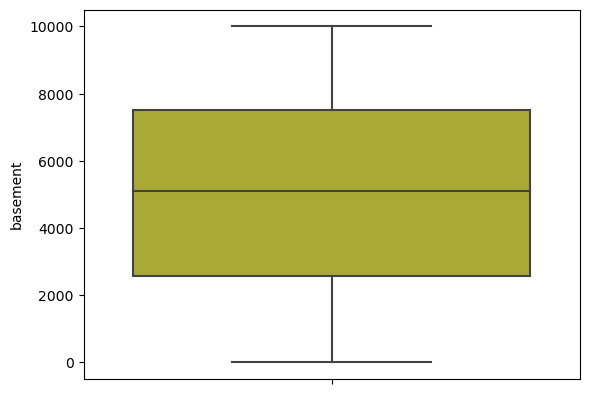

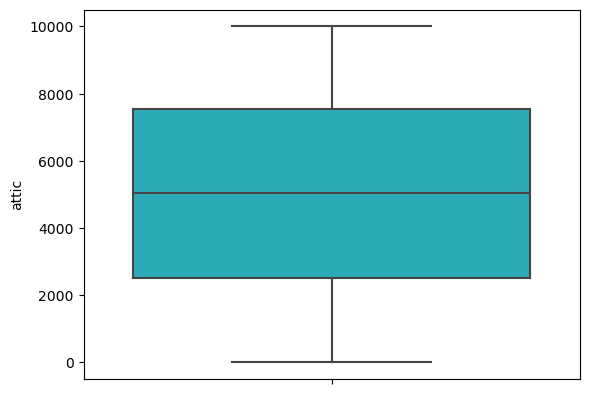

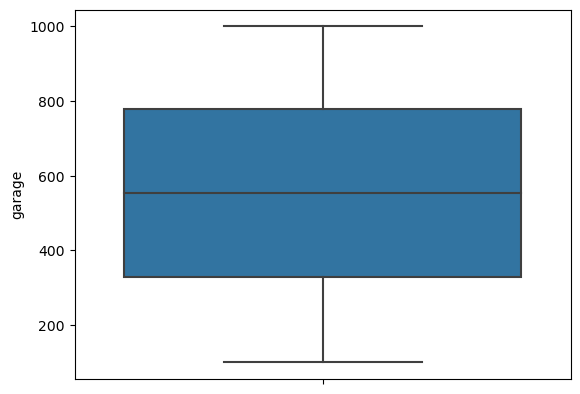

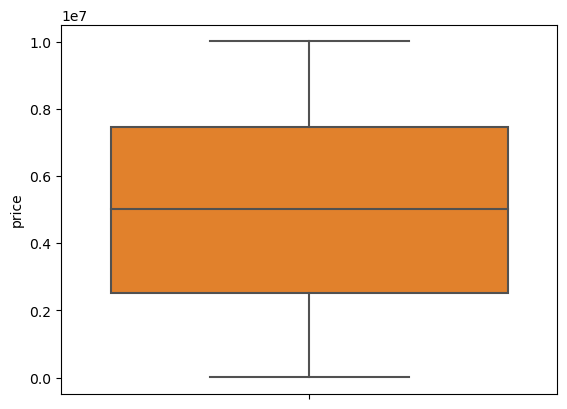

In [10]:
### Boxplot
for i in col:
    #if data[i].dtype != float:
        sns.boxplot(y=data[i],color=next(palette))
        plt.show()

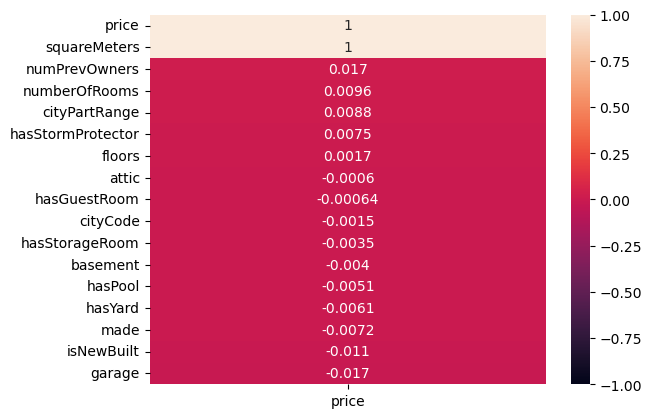

In [11]:
sns.heatmap(data.corr()[["price"]].sort_values(by="price",ascending=False),vmax=1,vmin=-1,annot=True)
plt.show()

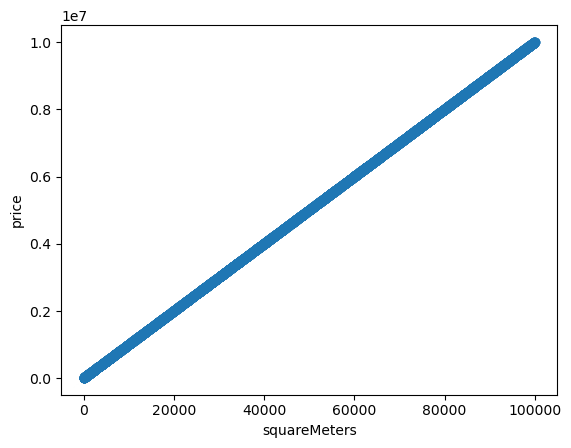

In [12]:
sns.regplot(x=data.squareMeters,y=data.price)
plt.show()

In [13]:
x = data[["squareMeters"]].values

In [14]:
y= data[["price"]].values

In [15]:
sc = StandardScaler()

In [16]:
x =sc.fit_transform(x)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=78)

In [18]:
LR = LinearRegression()

In [19]:
LR.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = LR.predict(x_test)

In [21]:
r2_score(y_test,y_pred)

0.9999987128123063

In [22]:
LR.score(x_test,y_test)

0.9999987128123063

In [23]:
LR.score(x_train,y_train)

0.9999987139525294

In [24]:
mean_absolute_error(y_test,y_pred)

2676.3831504203927

In [25]:
mean_squared_error(y_test,y_pred)

10852301.469932644

In [26]:
np.sqrt(mean_squared_error(y_test,y_pred))

3294.2831496294675

In [27]:
Output = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'],dtype=float)
Output.head()

,Actual,Prediction
0,6236152.9,6.234105e+06
1,4080383.1,4.082419e+06
2,4017300.1,4.020320e+06
3,994976.6,9.953401e+05
4,1024313.6,1.019640e+06


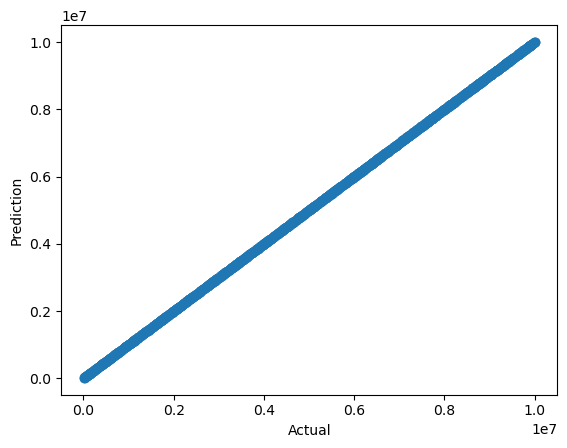

In [28]:
sns.regplot(data=Output,x='Actual',y='Prediction')
plt.show()